In [1]:
import requests as rq
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import re

In [2]:

bedroom3 =[]
type = []
price = []
sqrt = []
places = []
status=[]
facing = []
bathroom = []
for i in range(1,257):
    url = f"https://www.makaan.com/hyderabad-residential-property/rent-property-in-hyderabad-city?_=1708786761605&page={i}"
    page = rq.get(url)
    soup = BeautifulSoup(page.text)
    
    for i in soup.find_all('div',class_="cardLayout clearfix"):
        bedroom = i.find('div', class_ ='title-line').text
        if bedroom:
            regex = re.findall(r'(\d+)\s+(BHK|RK Studio)',bedroom)
            regex2 = re.findall(r'(Apartment|Independent House|Independent Floor|Villa)',bedroom)
            if regex:
                bedroom3.append((regex[0][0]))
                if regex2:
                    type.append((regex2[0]))
                else:
                    type.append(np.nan)
            else:
                bedroom3.append(np.nan)

    for i in soup.find_all('td',class_='price'):
        price1 = i.text
        if price1:
            price.append(price1)
        else:
            price.append(np.nan)

    for i in soup.find_all('td',class_='size'):
        sqrt1 = i.text
        if sqrt1:
            sqrt.append(sqrt1)
        else:
            sqrt.append(np.nan)

    for i in soup.find_all("div",class_ = "cardLayout clearfix"):
        place = i.find("span",class_="locName").text
        if place:
            regex= re.findall("(\w+\s?\w+?\s?\w+),?",place)
            if regex:
                places.append(regex[0])
            else:
                places.append(np.nan)
        else:
            places.append(np.nan)

    for i in soup.find_all('td', class_ ='val'):
        status.append(i.text)

    for i in soup.find_all('div',class_="infoWrap"):
    
        baths = i.find('ul', class_ ='listing-details').text
        if baths:
            regex= re.findall(r'(North|South|East|West|NorthEast|NorthWest|SouthEast|SouthWest)\s+facing',baths)
            if regex:
                facing.append(regex[0])
            else:
                facing.append('Unmentioned')

    for i in soup.find_all('div',class_="infoWrap"):
    
        baths = i.find('ul', class_ ='listing-details').text
        if baths:
            regex= re.findall(r'(\d+)\s+bathrooms',baths)
            if regex:
                bathroom.append(regex[0])
            else:
                bathroom.append(np.nan)
df = pd.DataFrame({"bedrooms": bedroom3, "type": type,"area": places, "status": status,"sqaure_feets": sqrt, "facing": facing, "bathrooms": bathroom, "price": price})
df.to_csv("makaan_dataset.csv")

In [3]:
len(sqrt),len(bedroom3),len(type),len(bathroom),len(facing)

(4491, 4491, 4491, 4491, 4491)

In [4]:
df = pd.read_csv(r'makaan_dataset.csv')

## EDA

In [5]:
df.drop('Unnamed: 0',axis= 1, inplace=True)

In [6]:
df

,bedrooms,type,area,status,sqaure_feets,facing,bathrooms,price
0,4,Independent Floor,Bandlaguda Jagir,Unfurnished,1900,Unmentioned,4.0,"25,000"
1,4,Independent House,Old Bowenpally,Unfurnished,1000,East,2.0,"16,500"
2,2,Independent House,Khairatabad Road,Semi-Furnished,700,NorthEast,1.0,"14,000"
3,4,Villa,Kokapet,Semi-Furnished,4200,East,4.0,1.25 L
4,1,Apartment,Lakdikapul,Unfurnished,600,Unmentioned,1.0,"8,000"
...,...,...,...,...,...,...,...,...
4486,2,Apartment,Gachibowli,Semi-Furnished,1000,Unmentioned,2.0,"15,000"
4487,1,Apartment,Anjaiah Nagar,Semi-Furnished,502,Unmentioned,1.0,"10,000"
4488,1,Apartment,Kondapur,Unfurnished,502,Unmentioned,1.0,"7,500"
4489,1,Apartment,Anjaiah Nagar,Semi-Furnished,522,Unmentioned,1.0,"11,500"


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4491 entries, 0 to 4490
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   bedrooms      4491 non-null   int64  
 1   type          4487 non-null   object 
 2   area          4491 non-null   object 
 3   status        4491 non-null   object 
 4   sqaure_feets  4491 non-null   int64  
 5   facing        4491 non-null   object 
 6   bathrooms     4438 non-null   float64
 7   price         4491 non-null   object 
dtypes: float64(1), int64(2), object(5)
memory usage: 280.8+ KB


#### Missing Value

In [8]:
df.isna().sum() # no null values

bedrooms         0
type             4
area             0
status           0
sqaure_feets     0
facing           0
bathrooms       53
price            0
dtype: int64

In [9]:
df.dropna(inplace=True)

In [10]:
df.isna().sum()

bedrooms        0
type            0
area            0
status          0
sqaure_feets    0
facing          0
bathrooms       0
price           0
dtype: int64

#### Checking for Duplicates 

In [11]:
df.duplicated().sum()

876

In [12]:
df.drop_duplicates(inplace=True)

In [13]:
df.duplicated().sum()

0

#### Strutural Erros

In [14]:
for i in df.columns:
    print("*" * 20 , i , "*" * 20)
    print(df[i].unique())

******************** bedrooms ********************
[ 4  2  1  5  3  7  6  8 10  9 12]
******************** type ********************
['Independent Floor' 'Independent House' 'Villa' 'Apartment']
******************** area ********************
['Bandlaguda Jagir' 'Old Bowenpally' 'Khairatabad Road' 'Kokapet'
 'Lakdikapul' 'Shaikpet' 'Nallagandla Gachibowli' 'Moinabad'
 'Pragathi Nagar' 'Boiguda' 'Moosapet' 'Somajiguda' 'Kothapet' 'Rajapur'
 'Kompally' 'Pocharam' 'Mansoorabad' 'Attapur' 'Miyapur' 'Upparpally'
 'Suraram' 'Quthbullapur' 'Maheshwaram' 'Nampally' 'Gachibowli'
 'Ramachandra Puram' 'Indresham' 'Gajulramaram Kukatpally' 'Krishna Reddy'
 'East Bahadurpura' 'Moghalpura' 'Nagole' 'Jillelguda' 'Toli Chowki'
 'Nanakramguda' 'Almasguda' 'muthangi' 'Shamshabad' 'Malakpet' 'Kapra'
 'Nizampet' 'Nacharam' 'Uppal' 'Abids' 'Madhapur' 'Gowlidody' 'Hyderguda'
 'Nallakunta' 'Sri Nagar' 'Banjara Hills' 'Habsiguda' 'Narsingi'
 'Jubilee Hills' 'Ayyappa Society' 'Padmarao Nagar' 'Rajendra Nagar'
 

In [15]:
df['price'] = df['price'].str.replace(',','')

In [16]:
def conversion(i):
    if "L" in i:
        a = i.replace('L','')
        b = float(a) * 100000
        return b
    else:
        return i
    

In [17]:
df['price'] = df['price'].apply(conversion)

In [18]:
for i in df.columns:
    print("*" * 20 , i , "*" * 20)
    print(df[i].unique())

******************** bedrooms ********************
[ 4  2  1  5  3  7  6  8 10  9 12]
******************** type ********************
['Independent Floor' 'Independent House' 'Villa' 'Apartment']
******************** area ********************
['Bandlaguda Jagir' 'Old Bowenpally' 'Khairatabad Road' 'Kokapet'
 'Lakdikapul' 'Shaikpet' 'Nallagandla Gachibowli' 'Moinabad'
 'Pragathi Nagar' 'Boiguda' 'Moosapet' 'Somajiguda' 'Kothapet' 'Rajapur'
 'Kompally' 'Pocharam' 'Mansoorabad' 'Attapur' 'Miyapur' 'Upparpally'
 'Suraram' 'Quthbullapur' 'Maheshwaram' 'Nampally' 'Gachibowli'
 'Ramachandra Puram' 'Indresham' 'Gajulramaram Kukatpally' 'Krishna Reddy'
 'East Bahadurpura' 'Moghalpura' 'Nagole' 'Jillelguda' 'Toli Chowki'
 'Nanakramguda' 'Almasguda' 'muthangi' 'Shamshabad' 'Malakpet' 'Kapra'
 'Nizampet' 'Nacharam' 'Uppal' 'Abids' 'Madhapur' 'Gowlidody' 'Hyderguda'
 'Nallakunta' 'Sri Nagar' 'Banjara Hills' 'Habsiguda' 'Narsingi'
 'Jubilee Hills' 'Ayyappa Society' 'Padmarao Nagar' 'Rajendra Nagar'
 

#### Type Casting 

In [19]:
df.dtypes

bedrooms          int64
type             object
area             object
status           object
sqaure_feets      int64
facing           object
bathrooms       float64
price            object
dtype: object

In [20]:
df['bedrooms'] = df['bedrooms'].astype('int')

In [21]:
df['sqaure_feets'] = df['sqaure_feets'].astype('float').round(1)

In [22]:
df['bathrooms'] = df['bathrooms'].astype('int')

In [23]:
df['price'] = df['price'].astype('float').round(1)

In [24]:
df.to_csv('makan.csv')

#### Checking for outliers

In [25]:
numeric = df.select_dtypes(include=['int','float'])

bedrooms           Axes(0.125,0.53;0.352273x0.35)
sqaure_feets    Axes(0.547727,0.53;0.352273x0.35)
bathrooms          Axes(0.125,0.11;0.352273x0.35)
price           Axes(0.547727,0.11;0.352273x0.35)
dtype: object

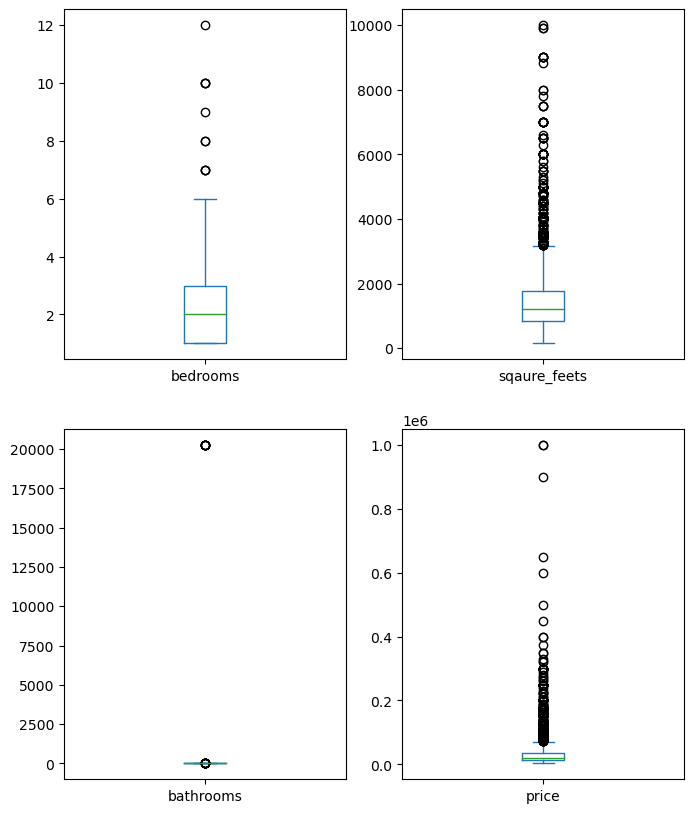

In [26]:
numeric.plot.box(subplots = True, layout = (2,2), figsize = (8,10))

In [27]:
df.drop(df[df['bathrooms'] > 10].index,inplace=True) # remove the outliers in bathrooms , remaing outliers are True

In [28]:
df.price.max()

1000000.0

In [29]:
df.price.min()

3000.0

In [30]:
df.drop(df[df['price'] > 200000].index,inplace=True)

In [31]:
df.shape

(3493, 8)

In [32]:
df

,bedrooms,type,area,status,sqaure_feets,facing,bathrooms,price
0,4,Independent Floor,Bandlaguda Jagir,Unfurnished,1900.0,Unmentioned,4,25000.0
1,4,Independent House,Old Bowenpally,Unfurnished,1000.0,East,2,16500.0
2,2,Independent House,Khairatabad Road,Semi-Furnished,700.0,NorthEast,1,14000.0
3,4,Villa,Kokapet,Semi-Furnished,4200.0,East,4,125000.0
4,1,Apartment,Lakdikapul,Unfurnished,600.0,Unmentioned,1,8000.0
...,...,...,...,...,...,...,...,...
4485,1,Apartment,Gachibowli,Semi-Furnished,506.0,Unmentioned,1,10000.0
4486,2,Apartment,Gachibowli,Semi-Furnished,1000.0,Unmentioned,2,15000.0
4488,1,Apartment,Kondapur,Unfurnished,502.0,Unmentioned,1,7500.0
4489,1,Apartment,Anjaiah Nagar,Semi-Furnished,522.0,Unmentioned,1,11500.0


## Data Visualization

#### 
Univariate

In [33]:
numeric.describe()

,bedrooms,sqaure_feets,bathrooms,price
count,3558.000000,3558.000000,3558.000000,3558.000000
mean,2.212760,1491.800450,42.001124,34101.672007
std,1.043871,1083.408279,897.019242,53227.795698
min,1.000000,150.000000,1.000000,3000.000000
25%,1.000000,850.000000,1.000000,12000.000000
50%,2.000000,1200.000000,2.000000,20000.000000
75%,3.000000,1784.500000,3.000000,36000.000000
max,12.000000,10000.000000,20245.000000,1000000.000000


In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

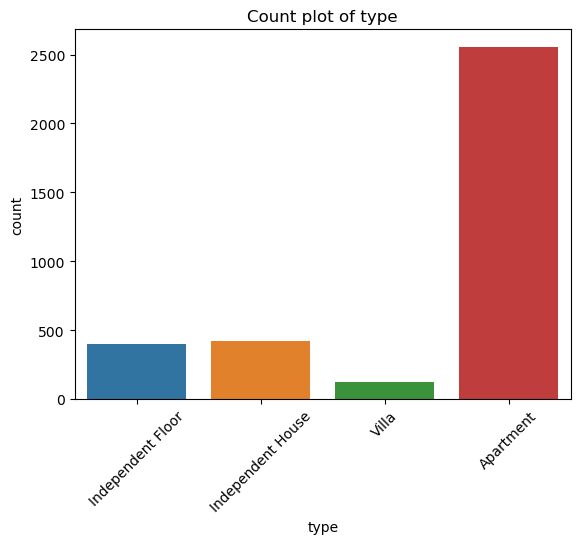

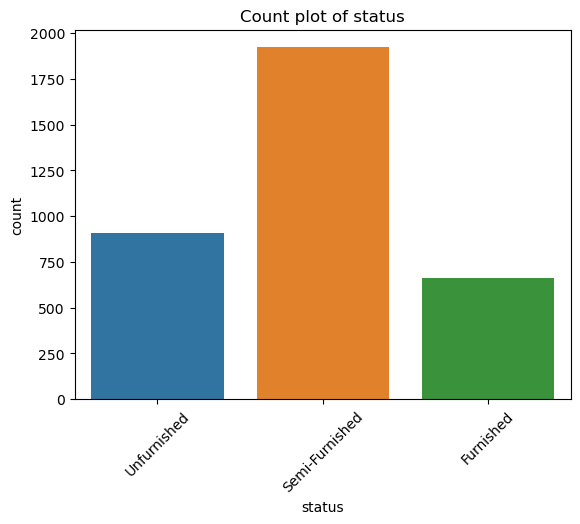

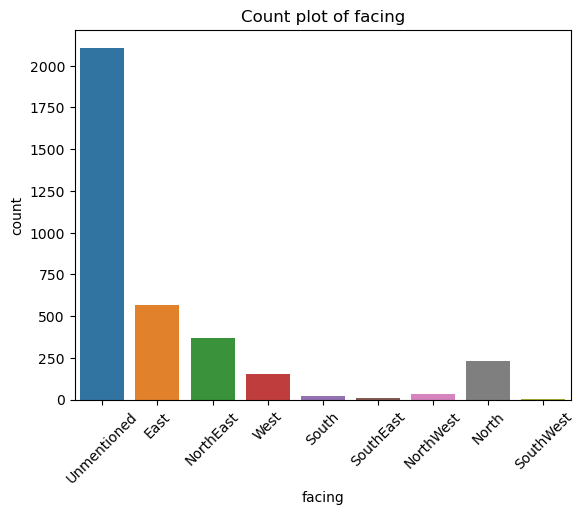

In [35]:
categorical_vars = ['type', 'status', 'facing']
for var in categorical_vars:
    sns.countplot(x=var, data=df)
    plt.title(f'Count plot of {var}')
    plt.xticks(rotation=45)
    plt.show()

#### Bivariate

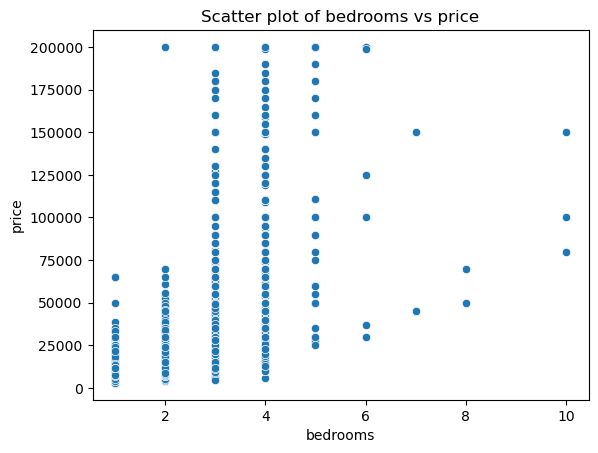

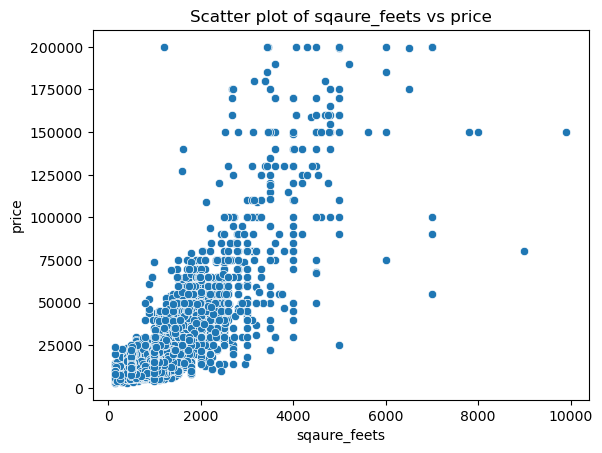

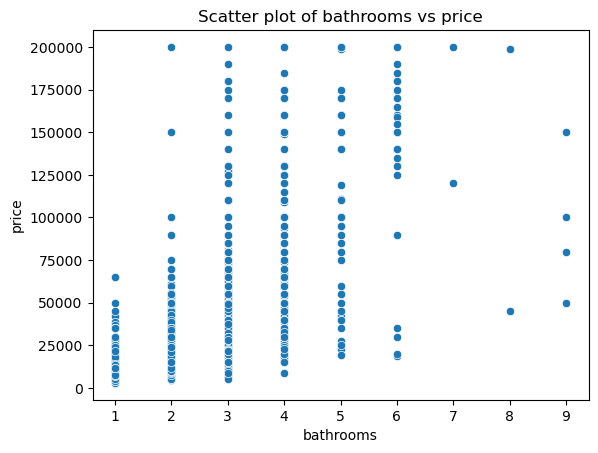

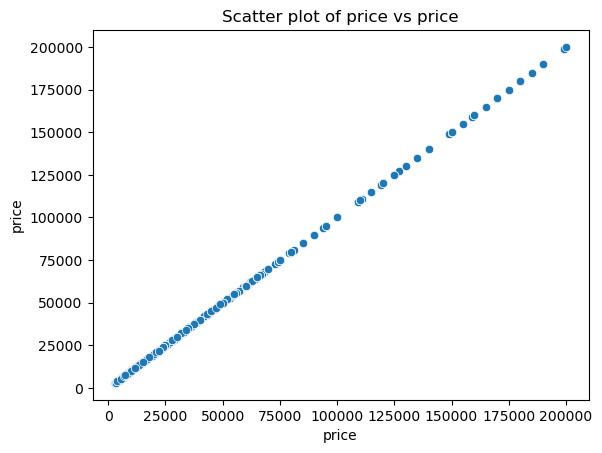

In [36]:
for var in numeric:
    sns.scatterplot(x=var, y='price', data=df)
    plt.title(f'Scatter plot of {var} vs price')
    plt.show()


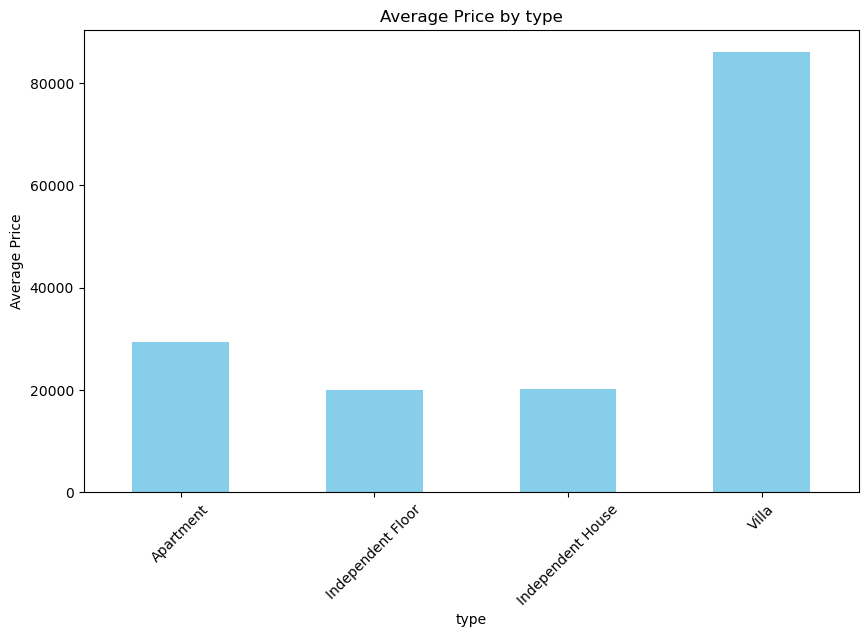

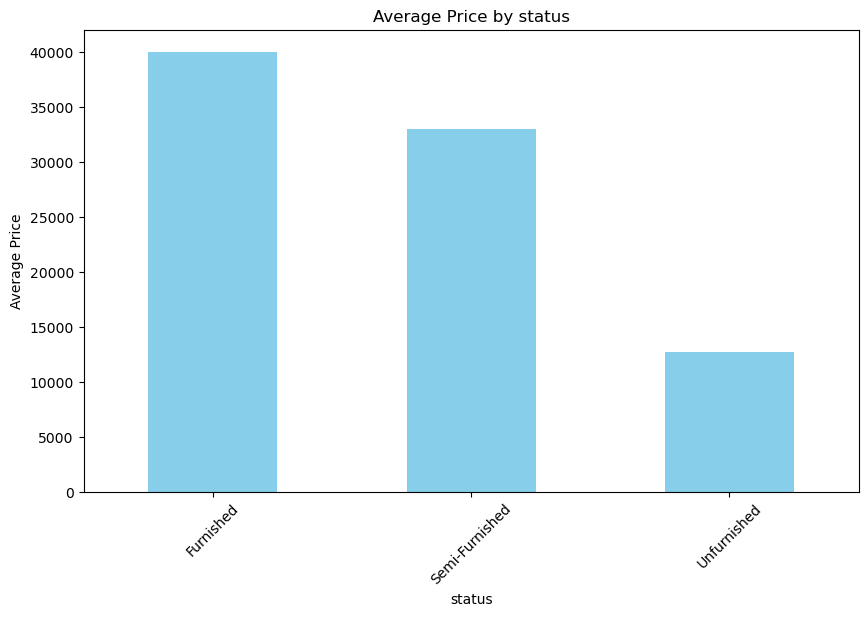

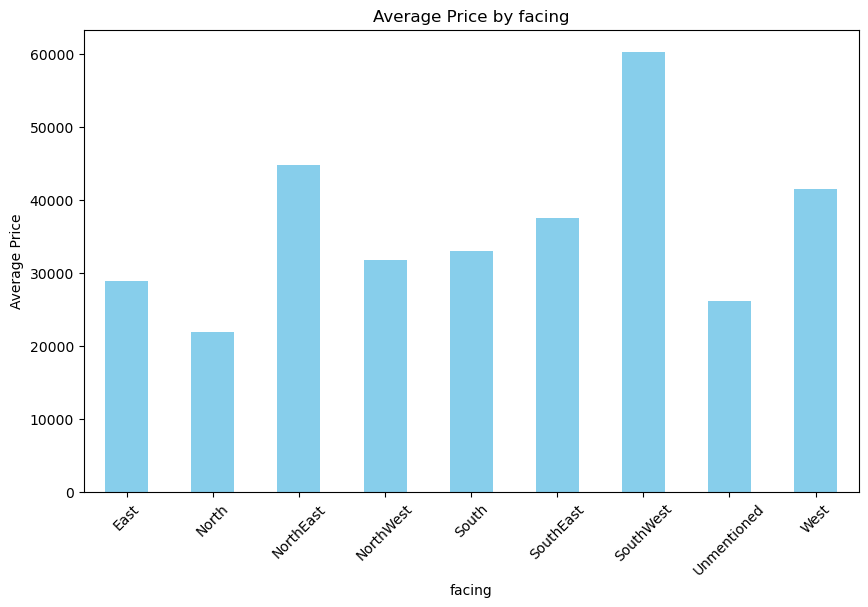

In [37]:
average_prices = {}
for var in categorical_vars:
    average_prices[var] = df.groupby(var)['price'].mean()
for var in categorical_vars:
    plt.figure(figsize=(10, 6))
    average_prices[var].plot(kind='bar', color='skyblue')
    plt.title(f'Average Price by {var}')
    plt.xlabel(var)
    plt.ylabel('Average Price')
    plt.xticks(rotation=45)
    plt.show()

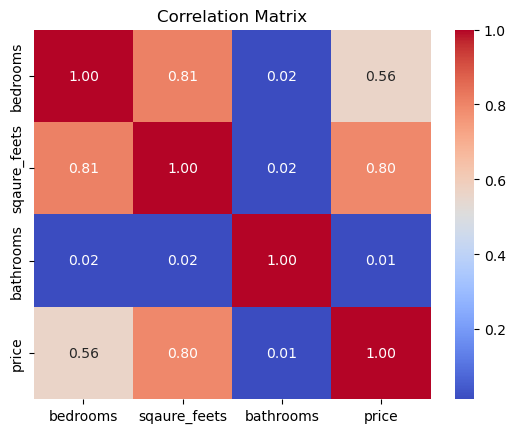

In [38]:
correlation_matrix = numeric.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


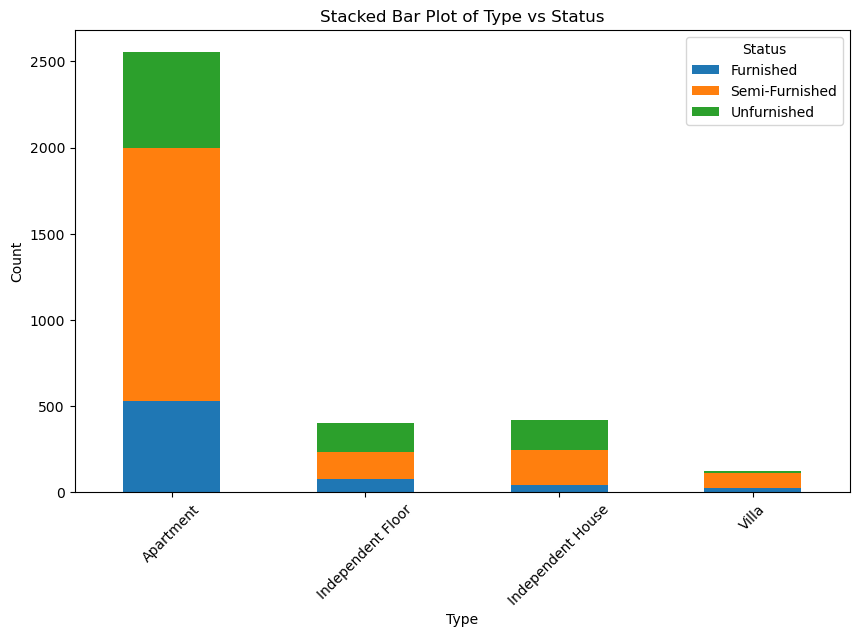

In [39]:
cross_tab = pd.crosstab(df['type'], df['status'])

cross_tab.plot(kind='bar', stacked=True, figsize=(10, 6))

plt.title('Stacked Bar Plot of Type vs Status')
plt.xlabel('Type')
plt.ylabel('Count')

plt.xticks(rotation=45)
plt.legend(title='Status')
plt.show()

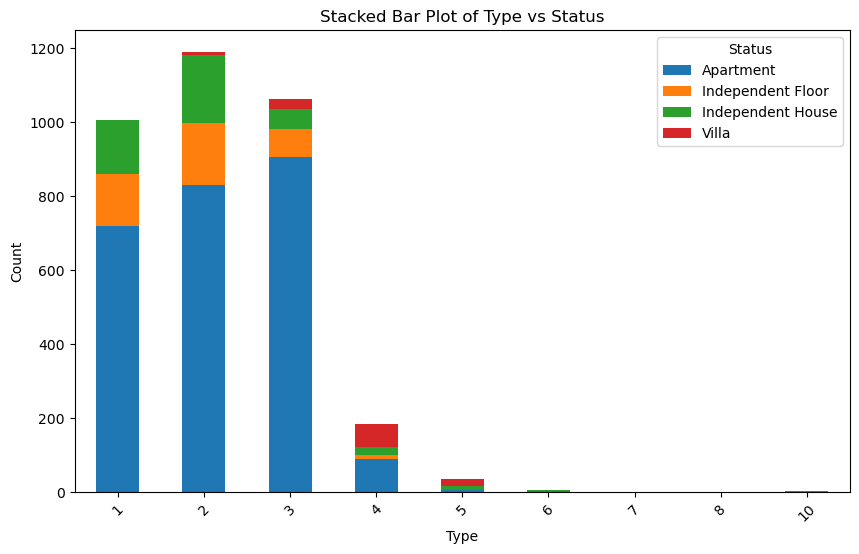

In [40]:
cross_tab = pd.crosstab(df['bedrooms'], df['type'])

cross_tab.plot(kind='bar', stacked=True, figsize=(10, 6))

plt.title('Stacked Bar Plot of Type vs Status')
plt.xlabel('Type')
plt.ylabel('Count')

plt.xticks(rotation=45)
plt.legend(title='Status')
plt.show()

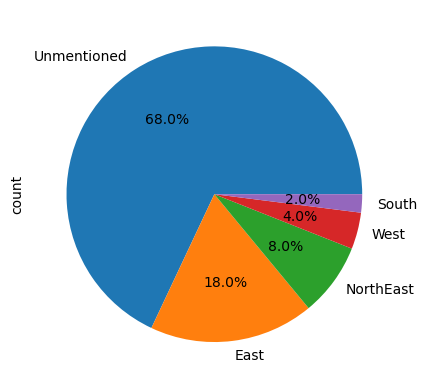

<Figure size 1000x500 with 0 Axes>

In [48]:
df.head(50)['facing'].value_counts().plot.pie(autopct="%.1f%%")
plt.figure(figsize=(10,5))
plt.show()

In [ ]:
pd.set_option('display.max_rows', 1000)

In [ ]:
df.groupby([df['area'],df['type']])['price'].max()

In [ ]:
df.groupby([df['area'],df['type']])['price'].min()

In [ ]:
df.groupby([df['area'],df['type']])['price'].mean()